##Objetivo del Proyecto
- En este proyecto exploraremos cómo Python maneja y procesa imágenes para su análisis. Nuestro objetivo será entrenar diversos algoritmos de Machine Learning para reconocer los números representados en cada imagen. Además, realizaremos un Análisis Exploratorio de Datos (EDA) enfocado en imágenes, descubriendo patrones y características clave.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.datasets import fetch_openml

In [59]:
mnist = fetch_openml('mnist_784', version=1)
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0           0       0       0       0       0       0       0       0       0   
 1           0       0       0       0       0       0       0       0       0   
 2           0       0       0       0       0       0       0       0       0   
 3           0       0       0       0       0       0       0       0       0   
 4           0       0       0       0       0       0       0       0       0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995       0       0       0       0       0       0       0       0       0   
 69996       0       0       0       0       0       0       0       0       0   
 69997       0       0       0       0       0       0       0       0       0   
 69998       0       0       0       0       0       0       0       0       0   
 69999       0       0       0       0       0       0       0       0       0   
 
      

In [60]:
X, y = mnist['data'], mnist['target'].astype(int)

In [61]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [62]:
y

,class
0,5
1,0
2,4
3,1
4,9
...,...
69995,2
69996,3
69997,4
69998,5


In [63]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.197414,0.099543,0.046629,0.016614,0.012957,0.001714,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.991206,4.256304,2.783732,1.561822,1.553796,0.320889,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.000000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [64]:
from plotly.subplots import make_subplots

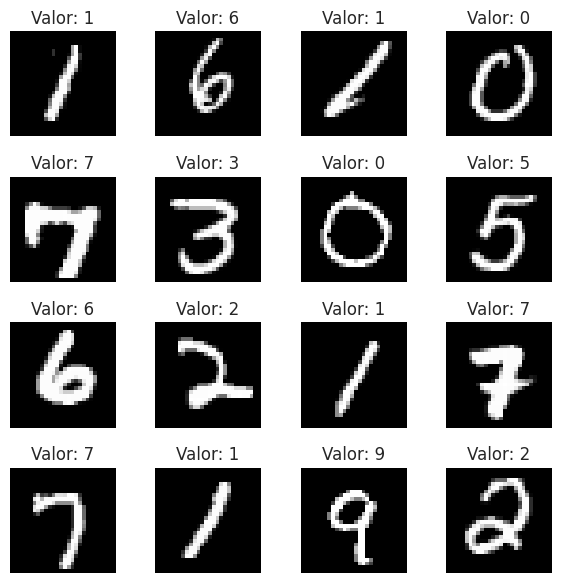

In [65]:
fig, axes = plt.subplots(4,4, figsize=(6,6))

for i, ax in enumerate(axes.flat):
    index = np.random.randint(len(X))
    ax.imshow(X.iloc[index].values.reshape(28,28), cmap='gray')
    ax.set_title(f'Valor: {y.iloc[index]}')
    ax.axis('off')
plt.tight_layout()
plt.show()


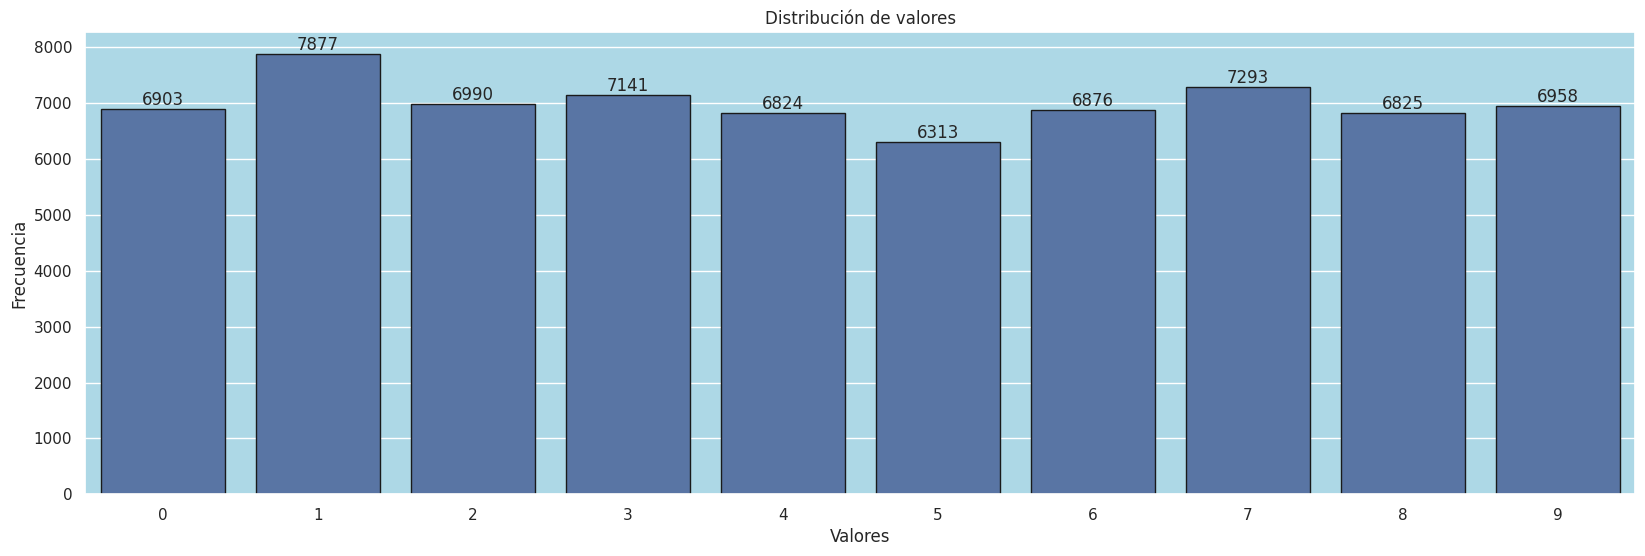

In [66]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.barplot(x=y.value_counts().index, y=y.value_counts().values, edgecolor='k')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
for i in range(10):
    plt.text(i, y.value_counts()[i], y.value_counts()[i], ha='center', va='bottom')
plt.title('Distribución de valores')
plt.show()

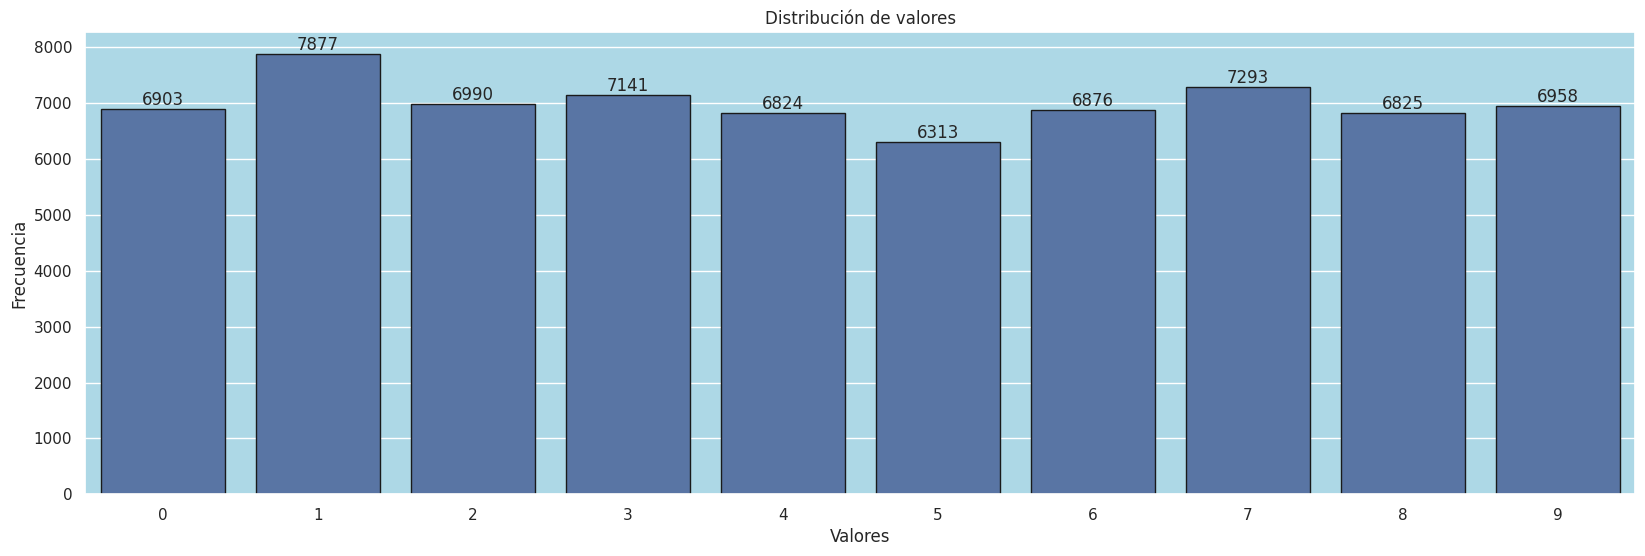

In [67]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.countplot(x=y, edgecolor='k')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')
for i in range(10):
    plt.text(i, y.value_counts()[i], y.value_counts()[i], ha='center', va='bottom')
plt.title('Distribución de valores')
plt.show()

In [68]:
fig = px.bar(x=y.value_counts().index, y=y.value_counts().values, labels={'x':'Valores', 'y':'Frecuencia'}, title='Distribución de valores')
fig.update_traces(texttemplate='%{y}', textposition='outside')
fig.show()

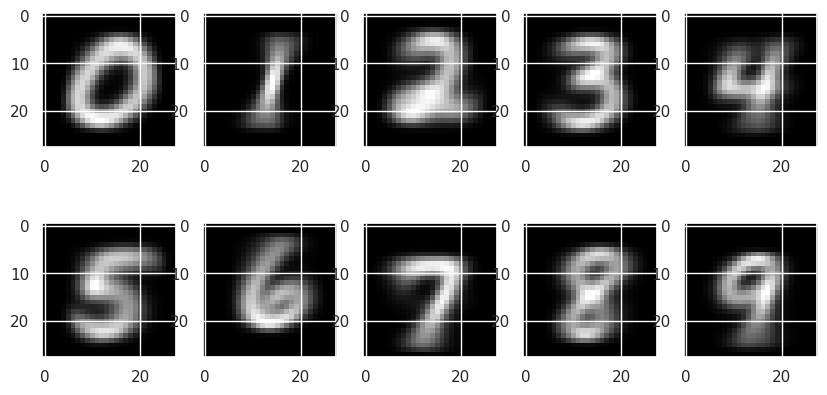

In [69]:
fig, axes = plt.subplots(2,5, figsize=(10,5))

for i in range(10):
    ax = axes[i//5, i%5]
    avg_images = X[y==i].mean(axis=0).values.reshape(28,28)
    ax.imshow(avg_images, cmap='gray')

plt.show()


##Machine Learning

##Entrenaremos primero para el número 5

In [70]:
y_binary = (y==5).astype(int)

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [73]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [74]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = modelo.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9749285714285715
[[12606   121]
 [  230  1043]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     12727
           1       0.90      0.82      0.86      1273

    accuracy                           0.97     14000
   macro avg       0.94      0.90      0.92     14000
weighted avg       0.97      0.97      0.97     14000



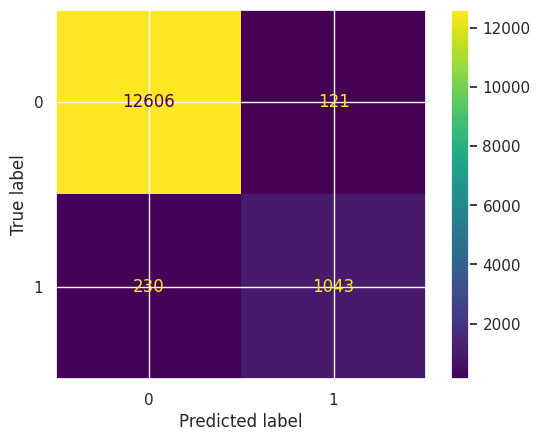

In [75]:
from sklearn import metrics

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, y_pred), display_labels=modelo.classes_)
disp.plot()
plt.show()


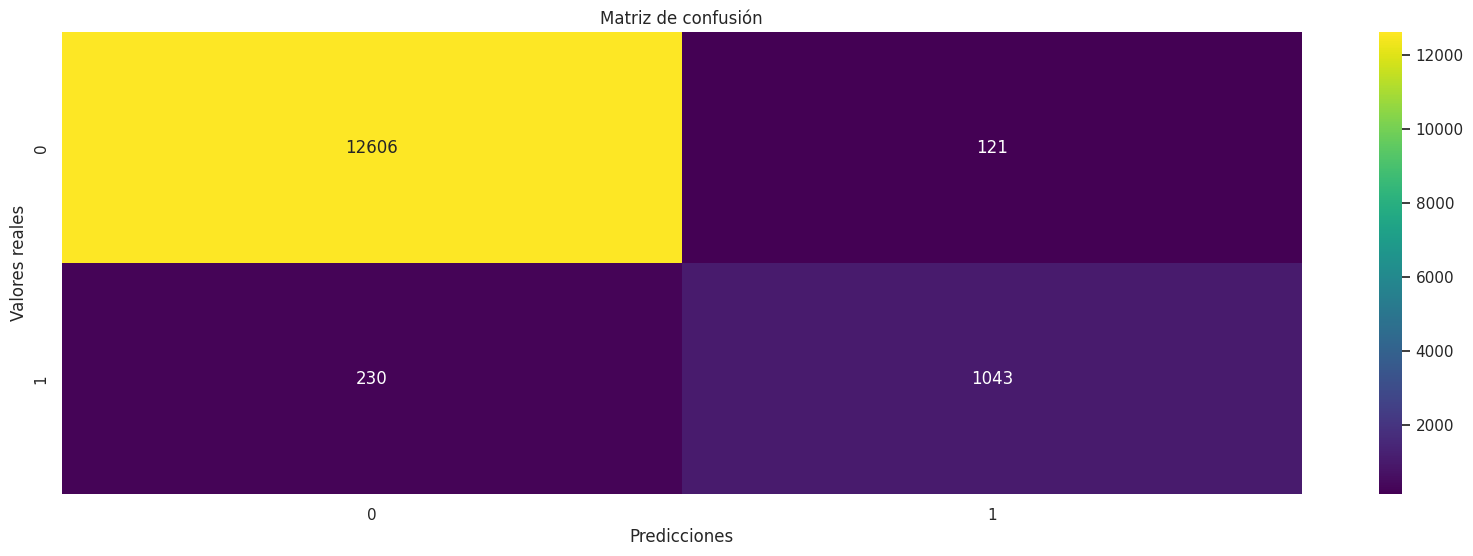

In [76]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [77]:
fig = px.imshow(confusion_matrix(y_test, y_pred), labels=dict(x='Predicciones', y='Valores reales'), text_auto=True)
fig.update_layout(title='Matriz de confusión',height=800, width=800)
fig.show()

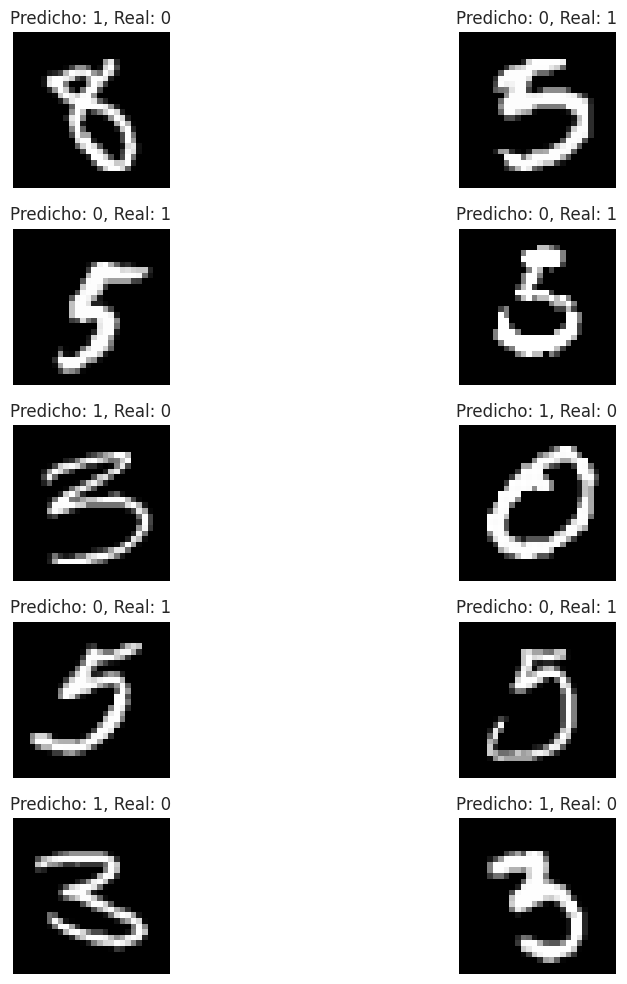

In [78]:
X_test = np.array(X_test)
incorrect_index = np.where(y_test != y_pred)[0]
plt.figure(figsize=(12, 10))

for i, index in enumerate(incorrect_index[:10]):
    plt.subplot(5, 2, i+1)
    plt.imshow(X_test[index].reshape(28, 28), cmap='gray')
    plt.title(f'Predicho: {y_pred[index]}, Real: {y_test.iloc[index]}')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
modelo = LogisticRegression(max_iter=1000, multi_class='multinomial')
modelo.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.



LogisticRegression(max_iter=1000, multi_class='multinomial')

In [81]:
y_pred = modelo.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9154285714285715
[[1282    1   11    0    1   13   22    4    7    2]
 [   0 1554    6    9    3    5    1    4   15    3]
 [   5   18 1235   19   13   14   21   16   27   12]
 [   7    8   38 1272    1   40    7   22   20   18]
 [   6    2   11    4 1185    5   13    9    9   51]
 [  11   11    8   41   12 1115   21    1   36   17]
 [   6    4   18    1   16   22 1320    3    6    0]
 [   4    4   24    5   12    6    0 1413    2   33]
 [  11   33   16   44    6   45   13    9 1162   18]
 [   7    9    7   15   38    5    0   49   12 1278]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1343
           1       0.95      0.97      0.96      1600
           2       0.90      0.89      0.90      1380
           3       0.90      0.89      0.89      1433
           4       0.92      0.92      0.92      1295
           5       0.88      0.88      0.88      1273
           6       0.93      0.95      0.94      

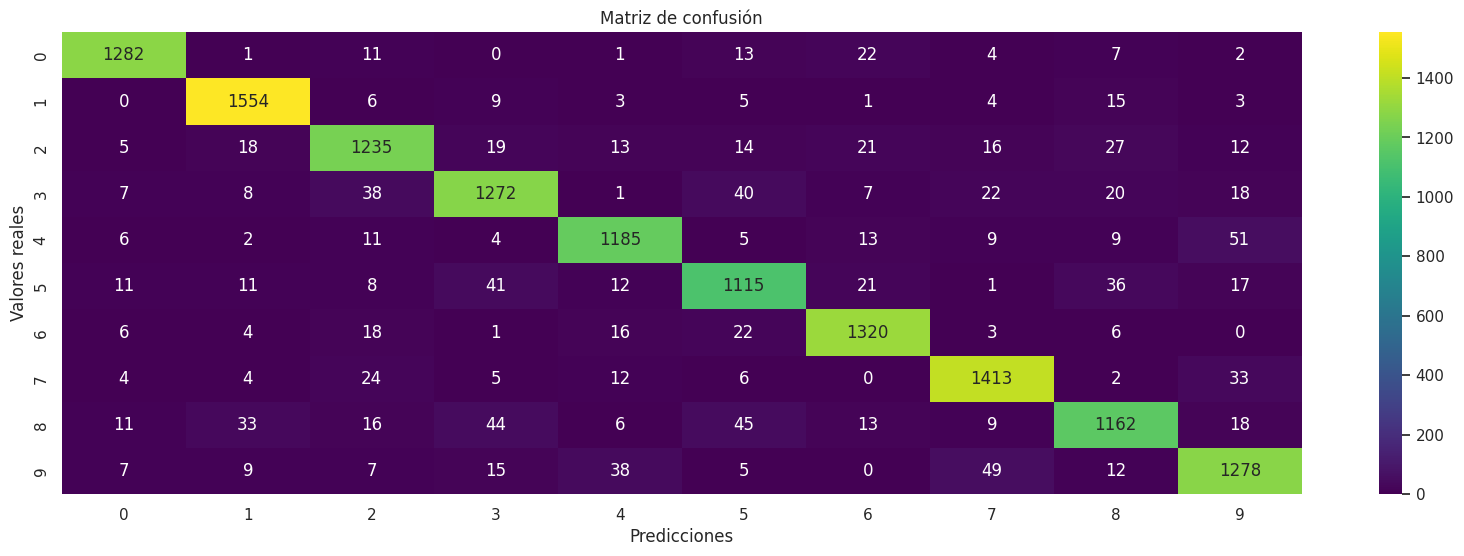

In [82]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [83]:
fig = px.imshow(confusion_matrix(y_test, y_pred), labels=dict(x='Predicciones', y='Valores reales'), text_auto=True)
fig.update_layout(title='Matriz de confusión',height=800, width=800)
fig.show ()

In [84]:
from sklearn.neighbors import KNeighborsClassifier

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [86]:
modelo = KNeighborsClassifier(n_neighbors=5)
modelo.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [87]:
y_pred = modelo.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Precisión del modelo: 0.9457857142857143
[[1319    0    4    2    0    5   10    2    1    0]
 [   0 1588    7    1    2    0    1    1    0    0]
 [   9   18 1289   19    7    7    8    9    8    6]
 [   1    3   16 1363    3   13    1   14    8   11]
 [   1   11   13    1 1205    1    3    4    3   53]
 [   4    3    2   29    8 1196   14    2    8    7]
 [  11    3    5    0    6    9 1360    0    2    0]
 [   3   18    6    2   18    1    0 1397    1   57]
 [  10   16   12   26    4   42    6   11 1214   16]
 [   5    4    7   17   26    3    0   44    4 1310]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.95      0.99      0.97      1600
           2       0.95      0.93      0.94      1380
           3       0.93      0.95      0.94      1433
           4       0.94      0.93      0.94      1295
           5       0.94      0.94      0.94      1273
           6       0.97      0.97      0.97      

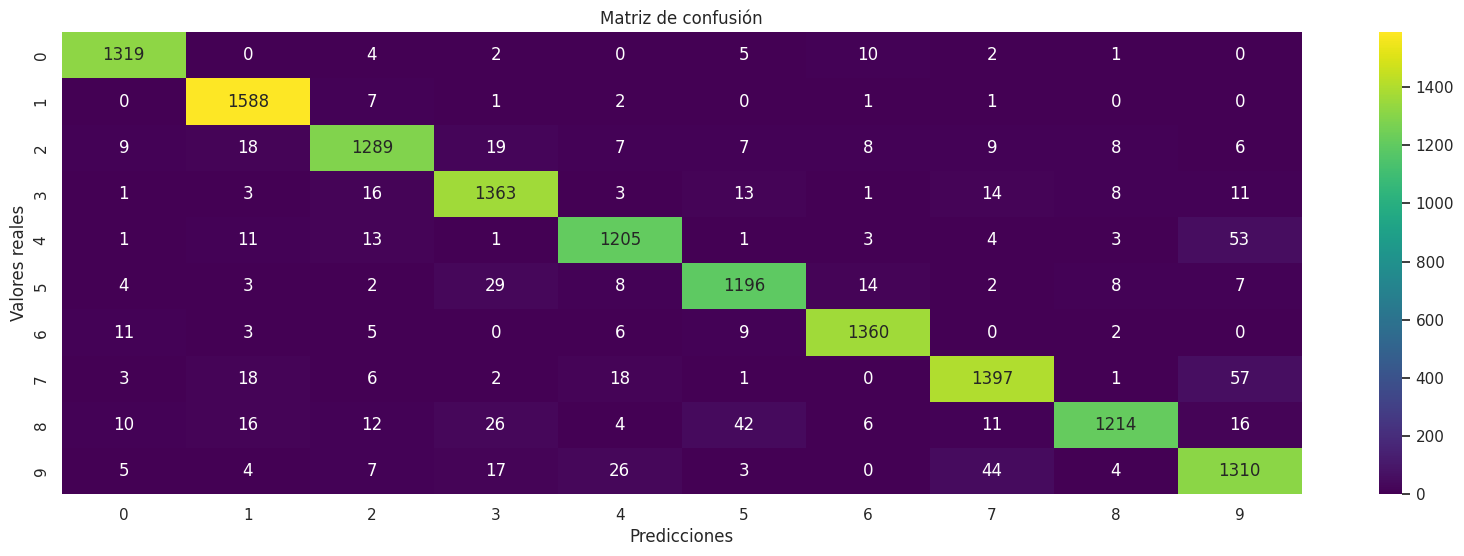

In [88]:
sns.set_style(style="darkgrid")
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'white'})
plt.figure(figsize=(20, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.show()

In [89]:
fig = px.imshow(confusion_matrix(y_test, y_pred), labels=dict(x='Predicciones', y='Valores reales'), text_auto=True)
fig.update_layout(title='Matriz de confusión',height=800, width=800)
fig.show ()

En este proyecto, exploré cómo Python maneja y procesa imágenes para su análisis, con el objetivo de entrenar algoritmos de Machine Learning para reconocer los números en imágenes del conjunto de datos MNIST.

Inicialmente, importé las bibliotecas necesarias: `pandas`, `numpy`, `matplotlib`, `seaborn`, `plotly` y `sklearn`. Luego, cargué el conjunto de datos MNIST usando `fetch_openml`, que contiene **70,000 imágenes de dígitos manuscritos** con 784 características (píxeles) cada una. Cada imagen tiene una etiqueta correspondiente al dígito que representa.

Realicé un análisis exploratorio de los datos (EDA) para comprender mejor el conjunto de datos. Esto incluyó:

*   Visualización de ejemplos aleatorios de dígitos.
*   Análisis de la distribución de frecuencia de cada dígito, tanto con gráficos de barras de `seaborn` como con gráficos interactivos de `plotly`.
*   Visualización de las imágenes promedio de cada dígito.

En la parte de Machine Learning, entrené tres modelos diferentes:

1.  **Regresión Logística para clasificación binaria (identificación del número 5)**:
    *   Dividí los datos en conjuntos de entrenamiento y prueba, escalé las características usando `StandardScaler`.
    *   Entrené un modelo de regresión logística y evalué su rendimiento usando `accuracy_score`, `confusion_matrix`, y `classification_report`.
    *   Visualicé la matriz de confusión con `ConfusionMatrixDisplay`, `heatmap` de `seaborn` e `imshow` de `plotly`.
    *   Identifiqué y visualicé ejemplos de imágenes mal clasificadas.
    *   El modelo alcanzó una **precisión del 97.49%** en la identificación del número 5.

2.  **Regresión Logística para clasificación multiclase (identificación de los 10 dígitos)**:
    *   Repetí el preprocesamiento de datos utilizado para la clasificación binaria.
    *   Entrené un modelo de regresión logística con la opción `multi_class='multinomial'` y evalué su rendimiento con las mismas métricas y visualizaciones.
    *   Este modelo obtuvo una **precisión del 91.54%** en la clasificación de los 10 dígitos.

3.  **K-Nearest Neighbors (KNN) para clasificación multiclase**:
    *   Realicé el mismo preprocesamiento de datos.
    *   Entrené un modelo KNN y evalué su rendimiento con las mismas métricas y visualizaciones.
    *   El modelo KNN logró una **precisión del 94.58%** en la clasificación de los 10 dígitos.

En resumen, este proyecto me permitió explorar cómo Python puede ser utilizado para procesar imágenes y aplicar algoritmos de Machine Learning para la clasificación de dígitos manuscritos utilizando el conjunto de datos MNIST. Los modelos de regresión logística y KNN tuvieron buenos resultados en términos de precisión, con el modelo KNN mostrando el mejor rendimiento general.
